In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
csv_file_path = 'data/lfpl_new.csv.gz'
data_types = { 'BibNum' : 'int64', 'Title': 'object', 'Author': 'object', 'ISBN': 'object', 'PublicationYear': 'int64', 'ItemType': 'object', 
              'ItemCollection': 'object',  'ItemLocation': 'object', 'ItemPrice': 'float64', 'ReportDate': 'object'}
# Read the compressed CSV file into a DataFrame
lfpl = pd.read_csv(csv_file_path, dtype=data_types, compression='gzip')
lfpl

,BibNum,Title,Author,ISBN,PublicationYear,ItemType,ItemCollection,ItemLocation,ItemPrice,ReportDate
0,707409,"Jeff Immelt and the new GE way : innovation, t...","Magee, David, 1965-",9780071605878,2009,Book,Adult Non-Fiction,Main,25.95,06/01/2023 00:00:00
1,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964-",9780307451408,2009,Book,Adult Non-Fiction,Southwest,19.99,06/01/2023 00:00:00
2,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964-",9780307451408,2009,Book,Adult Non-Fiction,Southwest,19.99,06/01/2023 00:00:00
3,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964-",9780307451408,2009,Book,Adult Non-Fiction,Remote Shelving - Main,19.99,06/01/2023 00:00:00
4,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964-",9780307451408,2009,Book,Adult Non-Fiction,Remote Shelving - Main,19.99,06/01/2023 00:00:00
...,...,...,...,...,...,...,...,...,...,...
1183919,2654213,The Saracen's mark,"Perry, SW",0655663452,0,Book,Interlibrary Loan,Main,0.00,06/01/2023 00:00:00
1183920,2654214,The hedge fund edge: maximum profit/minimum ri...,"Boucher, Mark",9780471185383,0,Book,Interlibrary Loan,Main,0.00,06/01/2023 00:00:00
1183921,2654215,"The maid, the man, and the fans: Elivis is the...","Rooks, Nancy; Gutter, Mae",9780533060535,0,Book,Interlibrary Loan,Main,0.00,06/01/2023 00:00:00
1183922,2654216,"The monstrous-feminine: film, feminism, psycho...","Creed, Barbara",9781136750755,0,Book,Interlibrary Loan,Main,0.00,06/01/2023 00:00:00


In [11]:
# Getting some data about the publication year

# Assuming lfpl is your DataFrame and 'PublicationYear' is your column
min_year = lfpl['PublicationYear'].min()
max_year = lfpl['PublicationYear'].max()
median_year = lfpl['PublicationYear'].median()

print(f"Minimum Year: {min_year}")
print(f"Maximum Year: {max_year}")
print(f"Median Year: {median_year}")

# Count the number of books published each year
book_counts = lfpl['PublicationYear'].value_counts()

# Print the result
print(book_counts)
book_counts = lfpl['PublicationYear'].value_counts().sort_index()
print(book_counts)


Minimum Year: 0
Maximum Year: 9999
Median Year: 2014.0
PublicationYear
2018    76085
2017    71383
2015    69074
2016    68864
2020    67821
        ...  
1818        1
1794        1
1814        1
1807        1
1829        1
Name: count, Length: 213, dtype: int64
PublicationYear
0        2737
1790        1
1794        1
1798        1
1800        4
        ...  
2021    60108
2022    44859
2023    15175
2109        4
9999        2
Name: count, Length: 213, dtype: int64


Distribution of Publication Years

This visualization will show the distribution of publication years for the books in the dataset. This can help to understand the age of the collection and identify any trends in the acquisition of books over time.

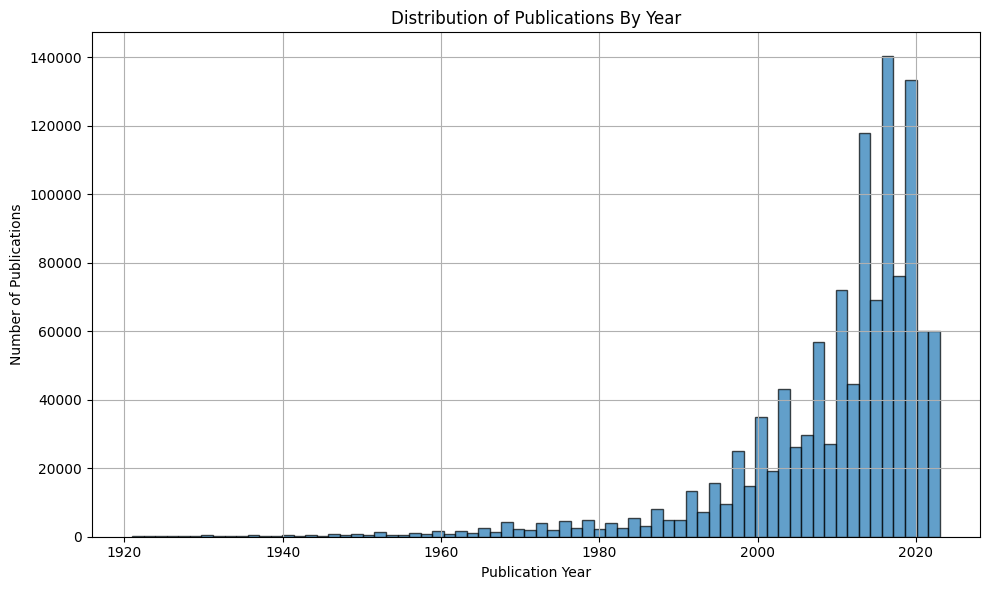

In [15]:
# Extract the publication year
from datetime import date
current_year = date.today().year
# Only showing relevant data
filtered_data = lfpl[(lfpl['PublicationYear'] > 1920) & (lfpl['PublicationYear'] <= current_year)]

# Extract the publication year
publication_years = filtered_data['PublicationYear']

# Create a histogram and add annotations for the top 5 years
plt.figure(figsize=(10, 6))
plt.hist(publication_years, bins=70, edgecolor='black', alpha=0.7, orientation='vertical')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.title('Distribution of Publications By Year')
plt.grid(True)
plt.tight_layout()
plt.show()




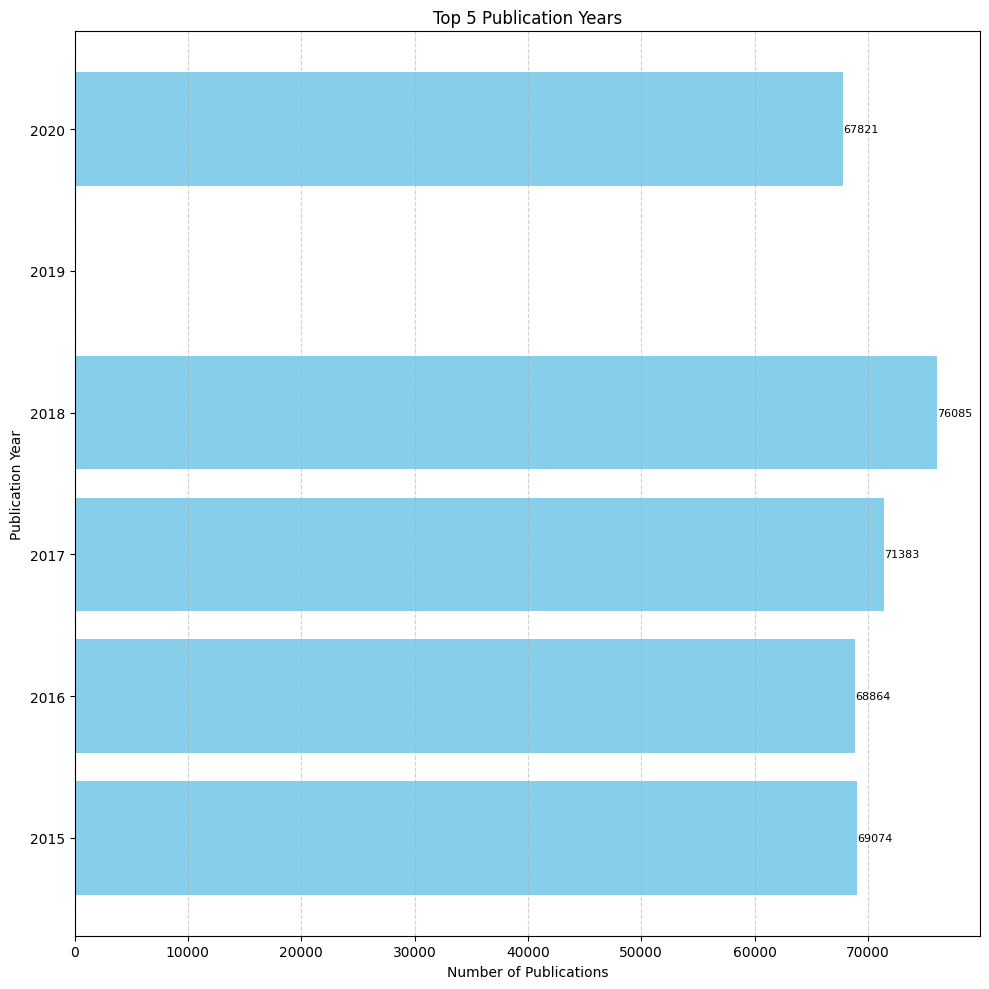

In [19]:
# Create a bar chart and add annotations for the top 5 years
# Identify the top 5 publication years
top_5_years = publication_years.value_counts().nlargest(5).index

plt.figure(figsize=(10, 10))
bars = plt.barh(top_5_years, publication_years.value_counts()[top_5_years], color='skyblue')
for bar, count in zip(bars, publication_years.value_counts()[top_5_years]):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(count), ha='left', va='center', fontsize=8)
plt.xlabel('Number of Publications')
plt.ylabel('Publication Year')
plt.title('Top 5 Publication Years')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Average Item Price by Item Collection

This visualization will show the average item price for each item collection in the dataset. This can help to identify any patterns in pricing across different collections.

In [36]:

print(f"Books with no Item Collection: {lfpl['ItemCollection'].isna().sum()}")
print(f"Books with price equal zero: {lfpl[lfpl['ItemPrice'] == 0].shape[0]}")

Books with no Item Collection: 187
Books with zero price equal zero: 682


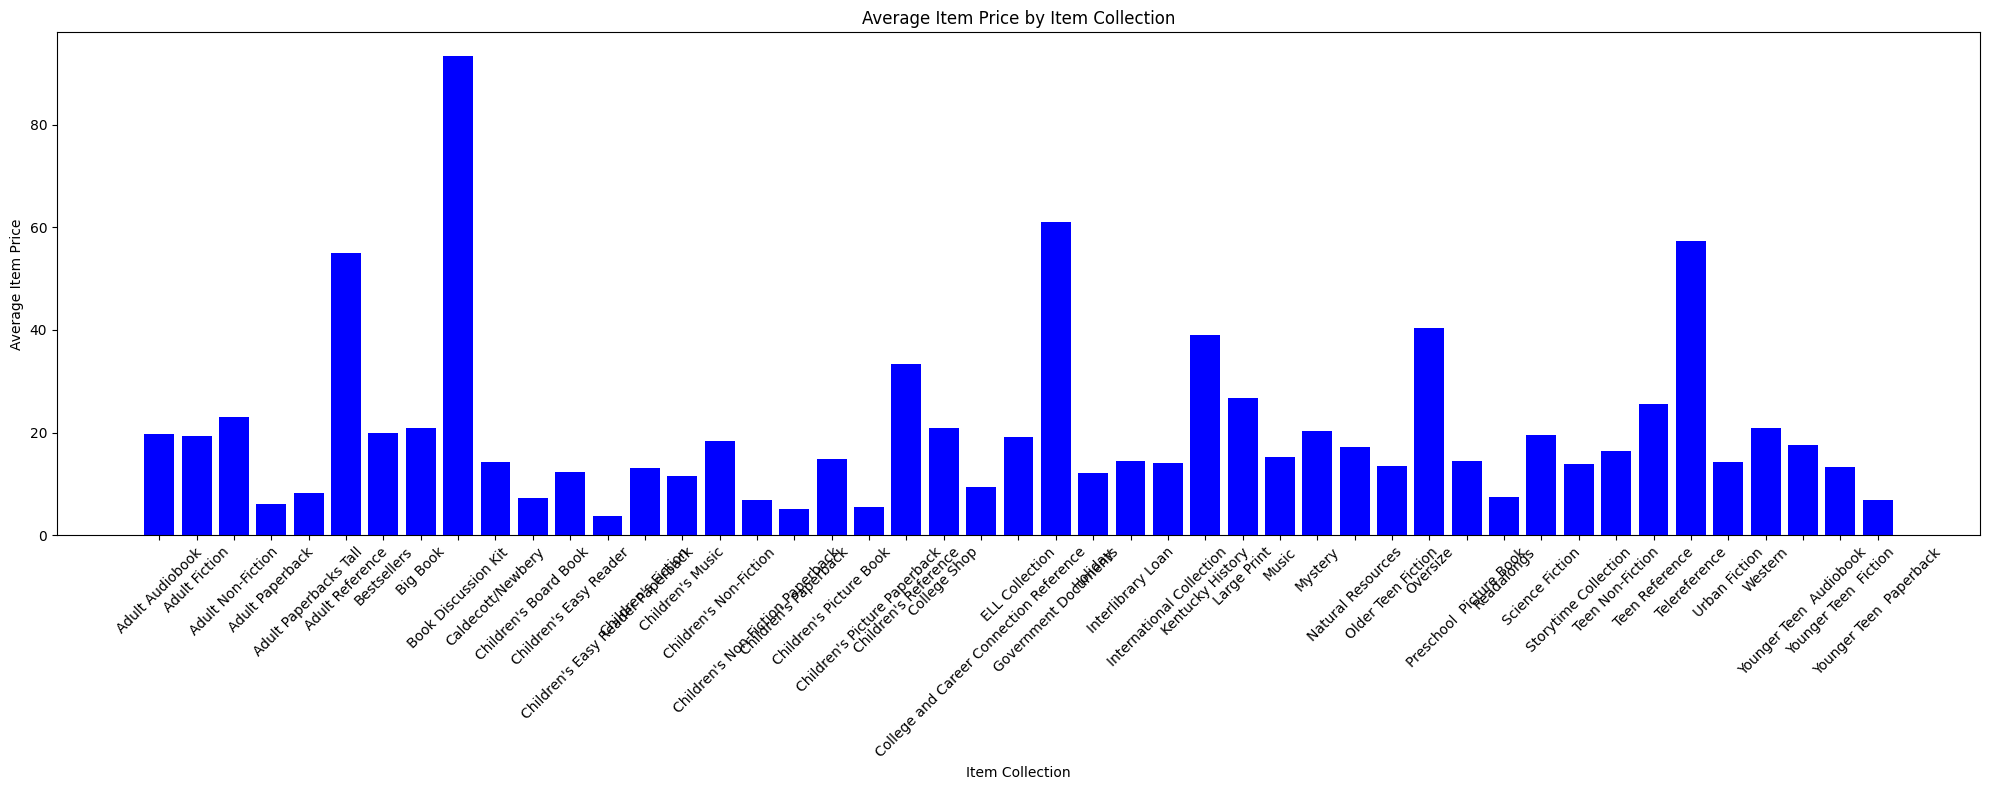

In [25]:

# Group by item collection and calculate average price

# Filter out records with ItemPrice equal to zero or with missing ItemCollection values
filtered_data = lfpl[(lfpl['ItemPrice'] != 0) & (lfpl['ItemCollection'].notna())]

# Group by item collection and calculate average price
avg_price_by_collection = filtered_data.groupby('ItemCollection')['ItemPrice'].mean()

# Create a bar chart
plt.figure(figsize=(20, 8))
plt.bar(avg_price_by_collection.index, avg_price_by_collection.values, color='blue')
plt.xlabel('Item Collection')
plt.ylabel('Average Item Price')
plt.title('Average Item Price by Item Collection')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of Books by Library

This visualization will show the distribution of books by library in the dataset. This can help to identify which libraries have the largest and most diverse collections.

In [42]:
lfpl['ItemLocation'].value_counts()


ItemLocation
Remote Shelving - Main       139668
Northeast                    124922
Southwest                    123039
Main                         122551
South Central                115426
Bon Air                       73838
St Matthews                   67940
Jeffersontown                 53349
Iroquois                      51727
Highlands - Shelby Park       45208
Crescent Hill                 42319
Childrens Main Library        38001
Middletown                    34195
Shively                       24339
Shawnee                       23731
Fairdale                      23098
Newburg                       22378
Western                       21020
Portland                      12761
Remote Shelving - Shawnee     10227
Childrens Bookmobile           8462
Main Teen                      5719
Content Management                4
Adult Bookmobile                  2
Name: count, dtype: int64

Content Management and Adult BookMobile doesn't appear to be valid locations.

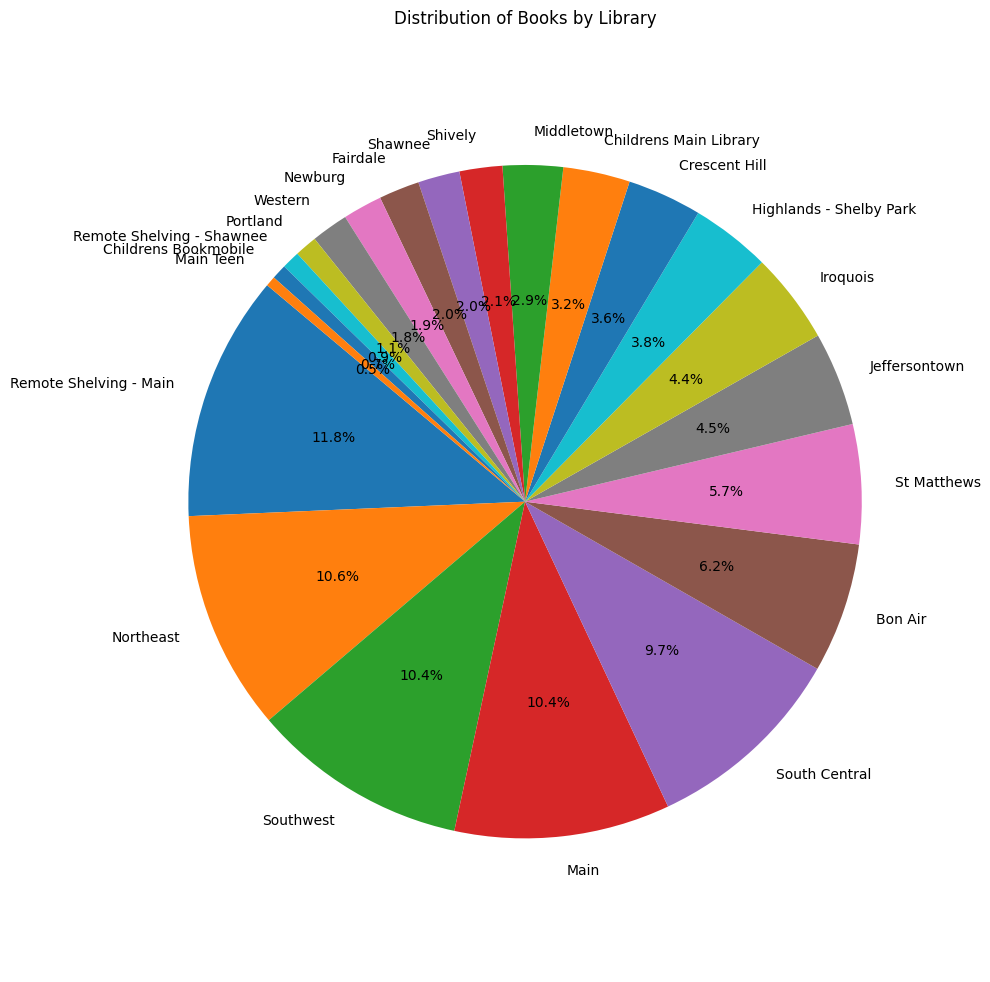

In [46]:
# Count books by item location

# Filter out records with ItemLocation values "Content Management" and "Adult BookMobile"
filtered_data = lfpl[lfpl['ItemLocation'] != "Content Management"]
filtered_data = filtered_data[filtered_data['ItemLocation'] != "Adult Bookmobile"]

# Count books by ItemLocation
books_by_location = filtered_data['ItemLocation'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(books_by_location, labels=books_by_location.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Distribution of Books by Library')
plt.tight_layout()
plt.show()

Bar Plot of Books per Location: This plot will show the number of books available at each location. Similar to above.

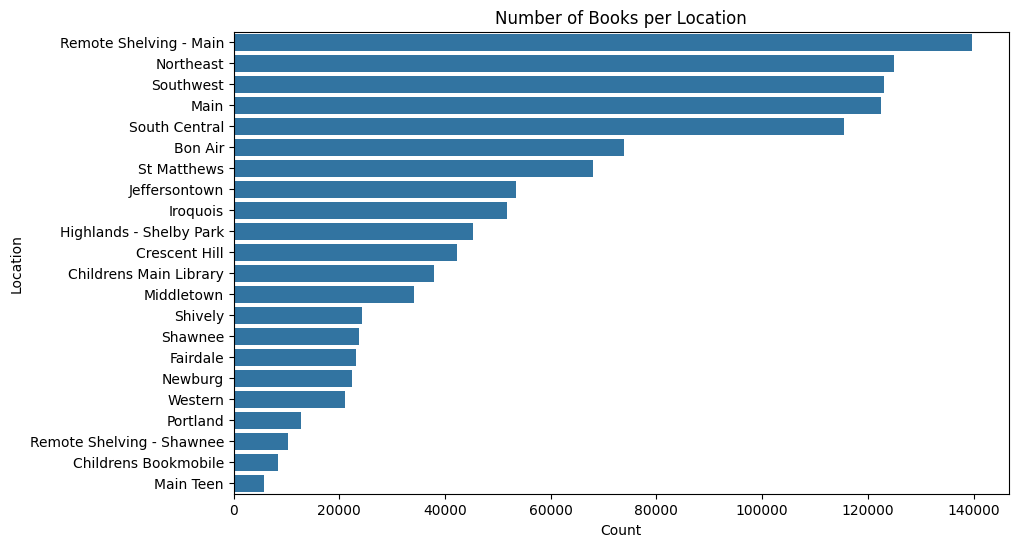

In [49]:
import seaborn as sns

# Filter the DataFrame
df_filtered = lfpl[~lfpl['ItemLocation'].isin(['Content Management', 'Adult Bookmobile'])]

# Get the order of locations by count
order = df_filtered['ItemLocation'].value_counts().index

plt.figure(figsize=(10,6))
sns.countplot(data=df_filtered, y='ItemLocation', order=order)
plt.title('Number of Books per Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()